In [1]:
!pip install matplotlib numpy openslide-python Pillow scikit-image scikit-learn scipy

In [32]:
import os
import PIL
from PIL import Image
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import openslide 
from openslide import OpenSlide
import cv2
import matplotlib.pyplot as plt
Image.MAX_IMAGE_PIXELS = None

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mayo-clinic-strip-ai/sample_submission.csv
/kaggle/input/mayo-clinic-strip-ai/train.csv
/kaggle/input/mayo-clinic-strip-ai/test.csv
/kaggle/input/mayo-clinic-strip-ai/other.csv
/kaggle/input/mayo-clinic-strip-ai/other/314263_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/0b33d7_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/54334d_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/84c279_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/cca9eb_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/880188_1.tif
/kaggle/input/mayo-clinic-strip-ai/other/2e3078_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/9daa03_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/065053_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/8acdfa_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/91530f_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/a2253f_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/f5eb8f_1.tif
/kaggle/input/mayo-clinic-strip-ai/other/ab830f_0.tif
/kaggle/input/mayo-clinic-strip-ai/other/d17ad3_2.tif

In [4]:
train_csv = pd.read_csv("../input/mayo-clinic-strip-ai/train.csv")
test_csv = pd.read_csv("../input/mayo-clinic-strip-ai/test.csv")

In [5]:
train_csv.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [6]:
test_csv.head()

,image_id,center_id,patient_id,image_num
0,006388_0,11,006388,0
1,008e5c_0,11,008e5c,0
2,00c058_0,11,00c058,0
3,01adc5_0,11,01adc5,0


In [10]:
train_csv["image_path"] = train_csv["image_id"].apply(lambda x: "../input/mayo-clinic-strip-ai/train/" + x + ".tif")
test_csv["image_path"]  = test_csv["image_id"].apply(lambda x: "../input/mayo-clinic-strip-ai/test/" + x + ".tif")
train_csv["Y"] = train_csv["label"].apply(lambda x : 1 if x=="CE" else 0) 
def enhance_df(df):
    df["image_size"]   = df["image_path"].apply(lambda x: Image.open(x).size)
    df["image_pixels"] = df["image_size"].apply(lambda x: int(x[0]*int(x[1])))    
    df["image_width"]  = df["image_size"].apply(lambda x: int(x[0]))
    df["image_height"] = df["image_size"].apply(lambda x: int(x[1]))
    df["aspect_ratio"] = df["image_width"]/df["image_height"]
    return df
train_csv=enhance_df(train_csv)
test_csv=enhance_df(test_csv)

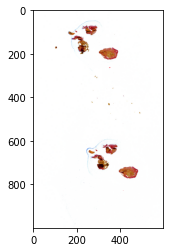

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '24004', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '14333', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (14333, 24004)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


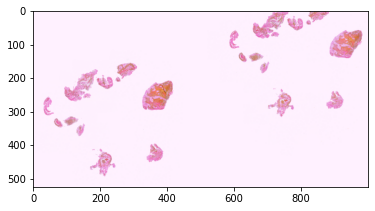

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '15632', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '29802', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (29802, 15632)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


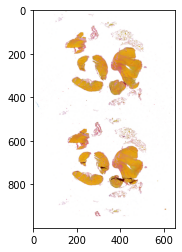

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '38705', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '25286', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (25286, 38705)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


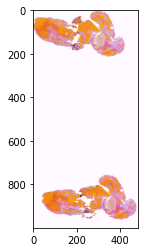

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '29538', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '14311', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (14311, 29538)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


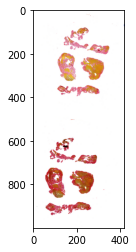

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '34151', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '14297', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (14297, 34151)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


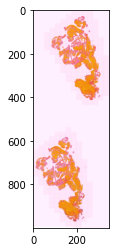

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '44291', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '15361', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (15361, 44291)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


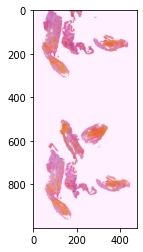

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '59901', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '28504', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (28504, 59901)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


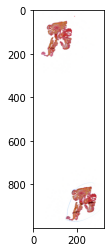

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '19149', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '6285', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (6285, 19149)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


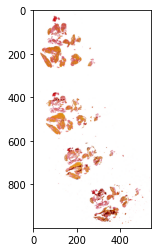

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '50678', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '27429', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (27429, 50678)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


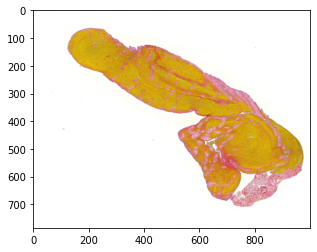

<_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '8267', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '10533', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '10', 'tiff.YResolution': '10'}>
slide.dimensions-- (10533, 8267)
slide.detectformat-- <bound method OpenSlide.detect_format of <class 'openslide.OpenSlide'>>
slide.level_count-- 1


In [26]:
while (i<10):
        slide=OpenSlide(np.random.choice(train_csv["image_path"]))
        slidenew=slide.get_thumbnail(size=(1000,1000))
        plt.imshow(slidenew)
        plt.show()
        print(slide.properties)
        print('slide.dimensions--',slide.dimensions)
        print('slide.detectformat--',slide.detect_format) 
        print('slide.level_count--',slide.level_count)
        i+=1

In [27]:
def preprocess(image_path):
    slide = OpenSlide(image_path)
    region = (1000,1000)    
    size = (5000, 5000)
    image = slide.read_region(region, 0, size)
    image = tf.image.resize(image, (512, 512))
    image = np.array(image)    
    return image

In [33]:
X=[]
for i in tqdm(train_csv['image_path']):
    x1=preprocess(i)
    X.append(x1)

100%|██████████| 754/754 [47:53<00:00,  3.81s/it]


In [34]:
X = np.array(X)/255.0
y = train_csv["Y"]

In [35]:
test_images=[]
for i in test_csv['file_path']:
    x1=preprocess(i)
    test_images.append(x1)
test_images=np.array(test_images)/255.0